#### Author Name: Fazle Rahat
#### Dataset: Credit Card Fraud Detection [Link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

# **Import all the important libraries**

In [ ]:
# Importing all the necessary library
import pandas as pd
import numpy as np
import random as rnd
import missingno as msno

# Improting for visualizing purpose
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as pgo
%matplotlib inline

# ml models that will be implemented on the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
creditcard=pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML HW/Project/creditcard.csv')

Mounted at /content/drive


In [ ]:
#Dataset load
creditcard = pd.read_csv('creditcard.csv')
creditcard.shape

(284807, 31)

In [ ]:
creditcard

# **Exploratory Data Analysis (EDA)**

In [ ]:
creditcard.head(10)

In [ ]:
#Try to understand about missing data of train and test
missing_data =  pd.DataFrame({'Total_missing': creditcard.isnull().sum(), 'percent_missing': (creditcard.isnull().sum()/284807)*100})
missing_data

In [ ]:
creditcard.Class[creditcard.Class==1].count()

In [ ]:
creditcard.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
creditcard.iloc[:,:-23].describe()

In [ ]:
creditcard.iloc[:,8:16].describe()

In [ ]:
creditcard.iloc[:,16:24].describe()

In [ ]:
creditcard.iloc[:,24:].describe()

In [ ]:
creditcard.info()

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=creditcard["Class"])

In [ ]:
crcrdplot= sns.heatmap(creditcard.corr(), annot=True)

In [ ]:
cr_crd_corel=creditcard.corr()
fig = plt.figure(figsize=(10,8), dpi=500)
sns.heatmap(cr_crd_corel, square=True, annot=True, fmt='0.1g', cmap="coolwarm", annot_kws={'size' : 5})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation among all features: ', fontsize=10);
plt.savefig("heatmap.png", dpi=500)

In [ ]:
plt.savefig("heatmap.png", dpi=300)

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create a boxplot for each column
fig, ax = plt.subplots(figsize=(20,10))
creditcard.iloc[:,3:10].boxplot(ax=ax)

# Set the title and axis labels
ax.set_title('Boxplot for Credit Card Fraud Dataset')
ax.set_xlabel('Columns')
ax.set_ylabel('Values')

# Show the plot
plt.show()

In [ ]:
## Taken from Kaggle
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise']
labels = ['Normal','Fraud']
values = creditcard['Class'].value_counts()/creditcard['Class'].shape[0]
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Fraud",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

In [ ]:
p=creditcard['Class'].value_counts()
q=creditcard['Class'].shape[0]
fig = pgo.Figure(data=[go.Pie(labels = ["Normal Transaction", "Fraud Traansaction"], values=creditcard['Class'].value_counts()/284807,hole=.2)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=15,marker=dict(colors=["green","red"], line=dict(color='white', width=0.1)))
fig.update_layout(title_text="Credit Card Fraud",
    paper_bgcolor="black",
    font_color="white",
)
fig.show()
plt.savefig("fraud.png", dpi=500)
                             

In [ ]:
p=creditcard["Amount"]
plt.scatter(range(len(p)), p)
plt.show()
plt.savefig("Amount.png", dpi=300)

In [ ]:
creditcard.Amount[creditcard.Amount>10000].count()

7

In [ ]:
max(creditcard["Amount"])

25691.16

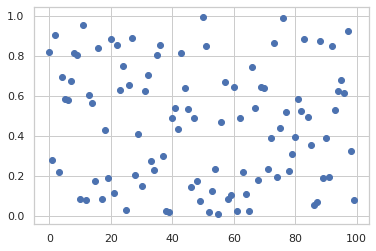

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature = np.random.rand(100)
plt.scatter(range(len(feature)), feature)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
stsc = StandardScaler()
amount = creditcard['Amount'].values
creditcard['Amount'] = stsc.fit_transform(amount.reshape(-1, 1))

In [ ]:
creditcard.corr()

In [ ]:
clr=["#0087A2"]
plt.figure(figsize=(16,6), dpi=200)
sns.barplot(x=creditcard.corr()['Class'][1:-1].index, y=creditcard.corr()['Class'][1:-1].values, palette=clr)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Feature Correlation with Class for Creditcard Dataset', fontsize=14);
plt.savefig("corelwthclass.png", dpi=200)

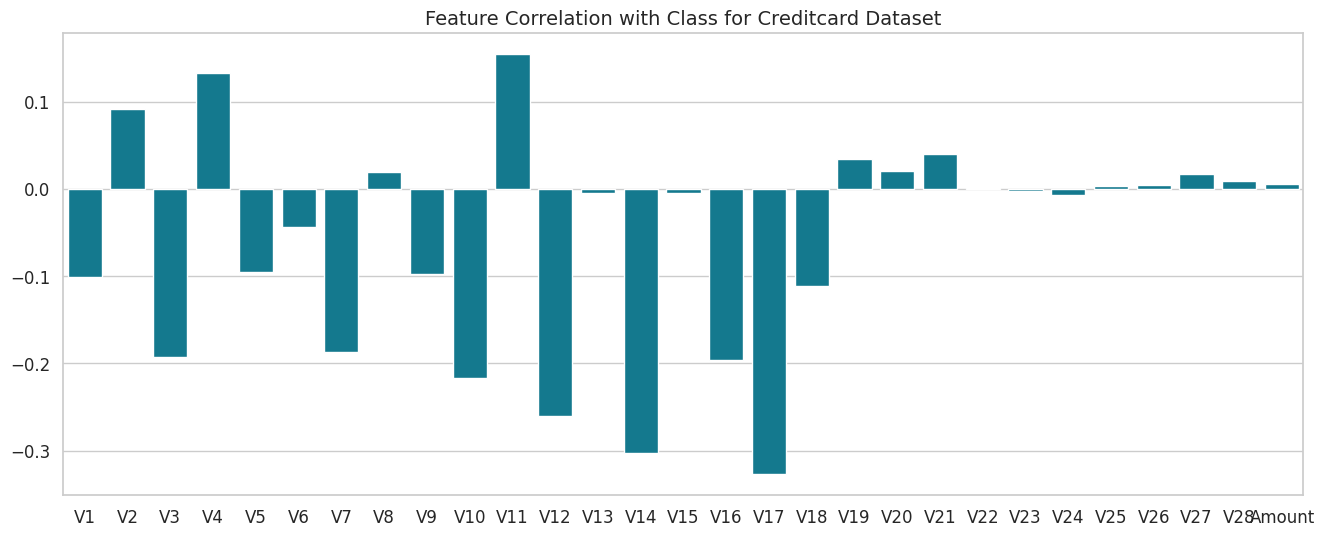

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x=creditcard.corr()['Class'][1:-1].index, y=creditcard.corr()['Class'][1:-1].values, palette=clr)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Feature Correlation with Class for Creditcard Dataset', fontsize=14);

In [ ]:
'''cre_data = creditcard.drop(['Time'], axis = 1)
X = np.array(cre_data.loc[:, cre_data.columns != 'Class'])
y = np.array(cre_data.loc[:, cre_data.columns == 'Class']).reshape(-1, 1)'''

In [ ]:
creditcard.columns

In [ ]:
cre_data = creditcard.drop(['Time','V13','V15','V22','V23','V25','V26'], axis = 1)

In [ ]:
cre_data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V24', 'V27',
       'V28', 'Amount', 'Class'],
      dtype='object')

In [ ]:
X = np.array(cre_data.loc[:, cre_data.columns != 'Class'])
y = np.array(cre_data.loc[:, cre_data.columns == 'Class']).reshape(-1, 1)

In [ ]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [ ]:
# split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size = 0.2, random_state = 2, shuffle = True, stratify = y)
                                                  

0    227451
1       394
dtype: int64


<Axes: >

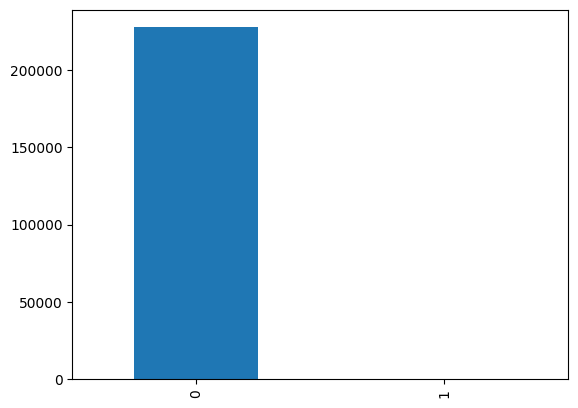

In [ ]:
# observe that data while imbalance
print(pd.Series(y_train.ravel()).value_counts())
pd.Series(y_train.ravel()).value_counts().plot.bar()

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [ ]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

In [ ]:
# observe that data has been balanced
print(pd.Series(y_train_new).value_counts())
pd.Series(y_train_new).value_counts().plot.bar()

In [ ]:
####################### Logistic Regression Classifier #############################

# import logistic regression model and accuracy_score metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score
clf = LogisticRegression(solver = 'lbfgs')

# fit the model
clf.fit(X_train_new, y_train_new)

# prediction for Testing data
y_test_pred_lr = clf.predict(X_test)

precision = precision_score(y_test, y_test_pred_lr)
f1 = f1_score(y_test, y_test_pred_lr)


print('Accuracy score of Logistic Regression for Testing Dataset = ', accuracy_score(y_test, y_test_pred_lr))

print('Precision score of Logistic Regression for Testing Dataset = ', precision)

print('F1 score of Logistic Regression for Testing Dataset = ', f1)

Accuracy score of Logistic Regression for Testing Dataset =  0.9738948772866122
Precision score of Logistic Regression for Testing Dataset =  0.05904761904761905
F1 score of Logistic Regression for Testing Dataset =  0.11117752540346684


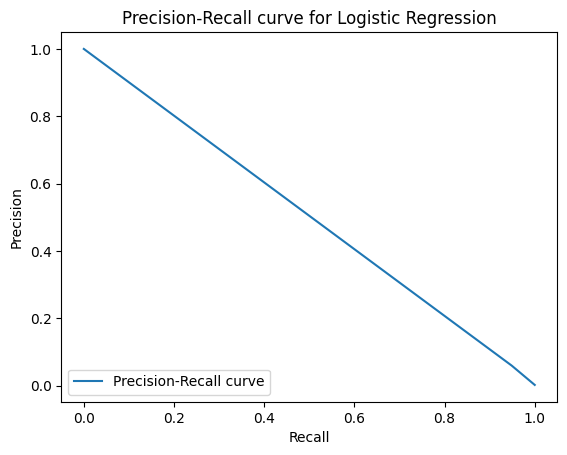

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_lr)

# plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for Logistic Regression')
plt.legend(loc='lower left')
plt.savefig("LRprerecurve.png", dpi=300)
plt.show()


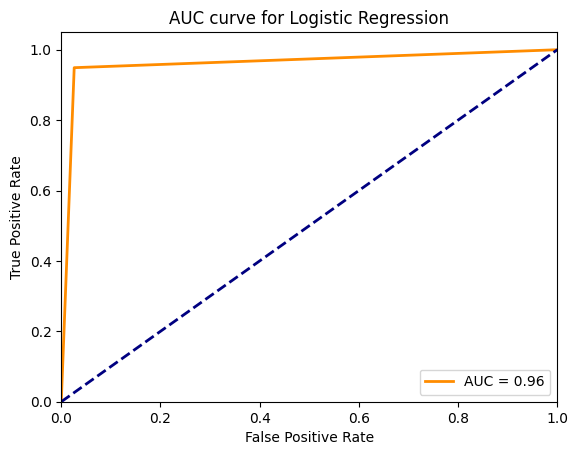

In [ ]:
# calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_lr)
roc_auc = auc(fpr, tpr)

# plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC curve for Logistic Regression')
plt.legend(loc="lower right")
plt.savefig("LRauccurve.png", dpi=300)
plt.show()


In [ ]:
############# CM for LR ############
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred_lr)
print('Accuracy score of Logistic Regression for Testing Dataset = ', accuracy_score(y_test, y_test_pred_lr))

print('Confusion Matrix for logistic regression - Testing Dataset')
print(pd.crosstab(y_test.ravel(), y_test_pred_lr, rownames = ['True'], colnames = ['Predicted'], margins = True))

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig("LRCM.png", dpi=300)
plt.show()


In [ ]:
pd.Series(y_train_new).value_counts()

0    227451
1    227451
dtype: int64

In [ ]:
'''from sklearn import svm
from sklearn.metrics import accuracy_score

# Create a SVM classifier object
clf = svm.SVC(kernel='linear')

# Train the classifier using X_train and y_train
clf.fit(X_train_new, y_train_new)

# Make predictions on test data
y_test_pred = clf.predict(X_test)

# Calculate accuracy scores for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)'''

In [ ]:
####################### Decision Tree Classifier #############################
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train the classifier using X_train and y_train
clf.fit(X_train_new, y_train_new)

# Make predictions on test data
y_test_pred_dt = clf.predict(X_test)

# Calculate accuracy scores for test data
test_accuracy = accuracy_score(y_test, y_test_pred_dt)

precision = precision_score(y_test, y_test_pred_dt)
f1 = f1_score(y_test, y_test_pred_dt)

print('Accuracy score of Decision Tree Classifier for Testing Dataset = ', test_accuracy)

print('Precision score of Decision Tree Classifier for Testing Dataset = ', precision)

print('F1 score of Decision Tree Classifier for Testing Dataset = ', f1)

Accuracy score of Decision Tree Classifier for Testing Dataset =  0.997489554439802
Precision score of Decision Tree Classifier for Testing Dataset =  0.3902439024390244
F1 score of Decision Tree Classifier for Testing Dataset =  0.5280528052805281


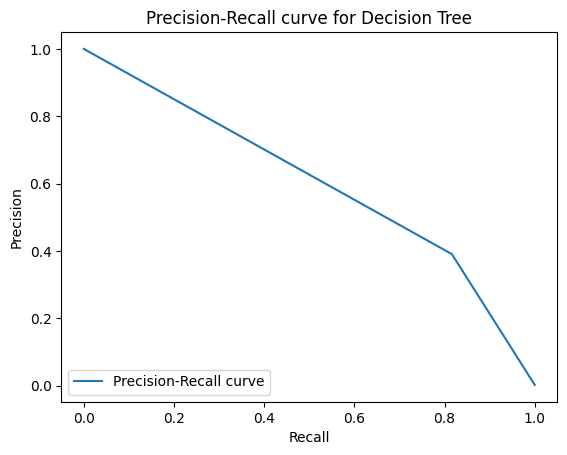

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_dt)

# plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for Decision Tree')
plt.legend(loc='lower left')
plt.savefig("DTprerecurve.png", dpi=300)
plt.show()


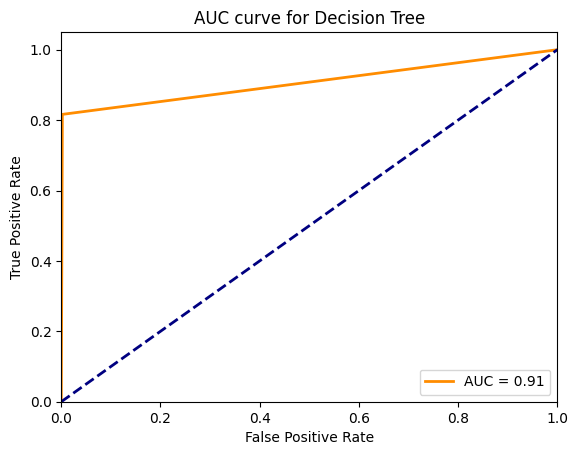

In [ ]:
# calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_dt)
roc_auc = auc(fpr, tpr)

# plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC curve for Decision Tree')
plt.legend(loc="lower right")
plt.savefig("DTauccurve.png", dpi=300)
plt.show()



Confusion Matrix of Decision tree - Testing Dataset
Predicted      0    1    All
True                        
0          56739  125  56864
1             18   80     98
All        56757  205  56962


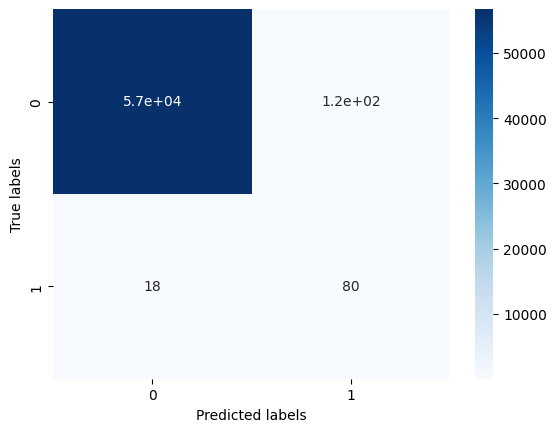

In [ ]:
############# CM for Decision Tree ############
print('\nConfusion Matrix of Decision tree - Testing Dataset')
print(pd.crosstab(y_test.ravel(), y_test_pred_dt, rownames = ['True'], colnames = ['Predicted'], margins = True))


cm = confusion_matrix(y_test, y_test_pred_dt)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig("DTCM.png", dpi=300)
plt.show()

In [ ]:
#################### Multi layer perceptron #####################

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create a Multi-layer Perceptron classifier object
clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')

# Train the classifier using X_train and y_train
clf.fit(X_train_new, y_train_new)

# Make predictions on test data
y_test_pred_mlp = clf.predict(X_test)

# Calculate accuracy score for test data
test_accuracy = accuracy_score(y_test, y_test_pred_mlp)

precision = precision_score(y_test, y_test_pred_mlp)
f1 = f1_score(y_test, y_test_pred_mlp)

print('Accuracy score of Decision Tree Classifier for Testing Dataset = ', test_accuracy)

print('Precision score of Decision Tree Classifier for Testing Dataset = ', precision)

print('F1 score of Decision Tree Classifier for Testing Dataset = ', f1)


Accuracy score of Decision Tree Classifier for Testing Dataset =  0.9988939995084443
Precision score of Decision Tree Classifier for Testing Dataset =  0.6377952755905512
F1 score of Decision Tree Classifier for Testing Dataset =  0.72


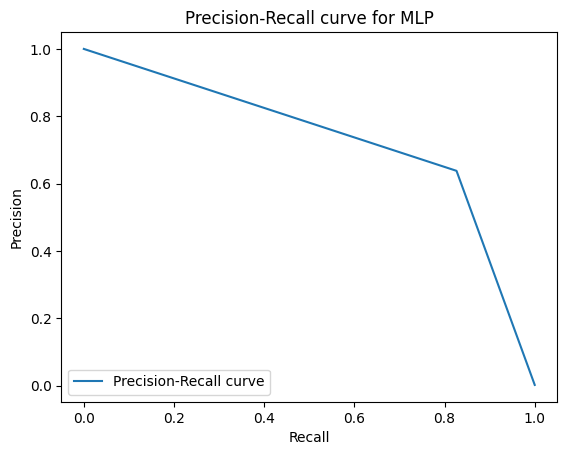

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_mlp)

# plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for MLP')
plt.legend(loc='lower left')
plt.savefig("MLPprerecurve.png", dpi=300)
plt.show()

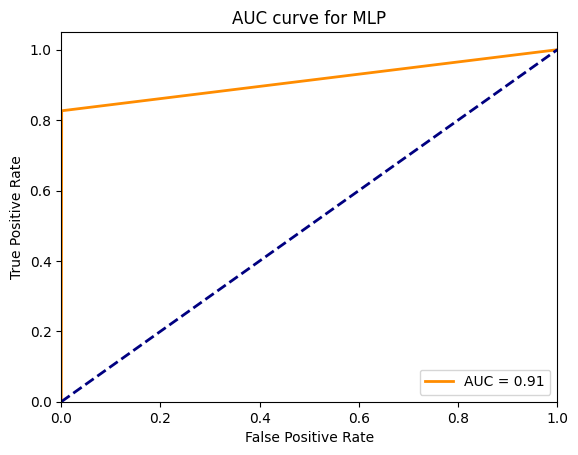

In [ ]:
# calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_mlp)
roc_auc = auc(fpr, tpr)

# plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC curve for MLP')
plt.legend(loc="lower right")
plt.savefig("MLPauccurve.png", dpi=300)
plt.show()


Confusion Matrix of multilayer perceptron - Testing Dataset
Predicted      0    1    All
True                        
0          56818   46  56864
1             17   81     98
All        56835  127  56962


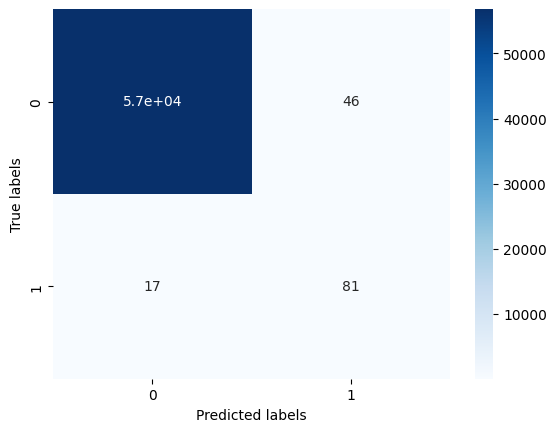

In [ ]:
############# CM for MLP ############

print('\nConfusion Matrix of multilayer perceptron - Testing Dataset')
print(pd.crosstab(y_test.ravel(), y_test_pred_mlp, rownames = ['True'], colnames = ['Predicted'], margins = True))

cm = confusion_matrix(y_test, y_test_pred_mlp)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig("MLPCM.png", dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# calculate the F1 score
f1_mlp = f1_score(y_test, y_test_pred_mlp)

# print the F1 score
print('F1 score for Multilayer Perceptron: {:.4f}'.format(f1_mlp))

F1 score for Multilayer Perceptron: 0.5809


In [ ]:
#####################Random Forest Classifier##############
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier object
clf = RandomForestClassifier(n_estimators=100, max_depth=14, random_state=42)

# Train the classifier using X_train and y_train
clf.fit(X_train_new, y_train_new)

# Make predictions on test data
y_test_pred_rf = clf.predict(X_test)

# Calculate accuracy scores for test data
test_accuracy = accuracy_score(y_test, y_test_pred_rf)


precision = precision_score(y_test, y_test_pred_rf)
f1 = f1_score(y_test, y_test_pred_rf)

print('Accuracy score of Decision Tree Classifier for Testing Dataset = ', test_accuracy)

print('Precision score of Decision Tree Classifier for Testing Dataset = ', precision)

print('F1 score of Decision Tree Classifier for Testing Dataset = ', f1)


Accuracy score of Decision Tree Classifier for Testing Dataset =  0.9990871107053826
Precision score of Decision Tree Classifier for Testing Dataset =  0.6885245901639344
F1 score of Decision Tree Classifier for Testing Dataset =  0.7636363636363637


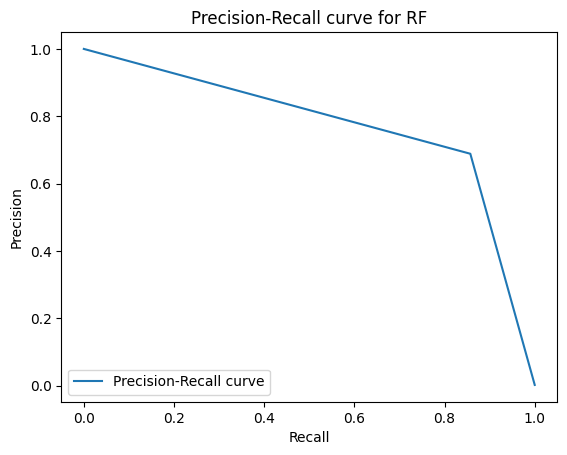

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_rf)

# plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for RF')
plt.legend(loc='lower left')
plt.savefig("RFPprerecurve.png", dpi=300)
plt.show()

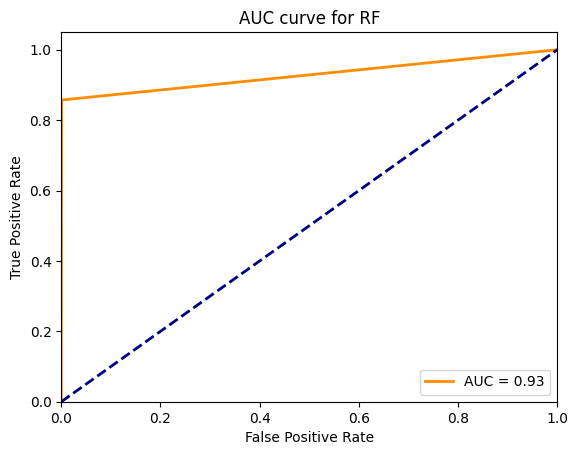

In [ ]:
# calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_rf)
roc_auc = auc(fpr, tpr)

# plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC curve for RF')
plt.legend(loc="lower right")
plt.savefig("RFPauccurve.png", dpi=300)
plt.show()


Confusion Matrix of random forest - Testing Dataset
Predicted      0    1    All
True                        
0          56826   38  56864
1             14   84     98
All        56840  122  56962


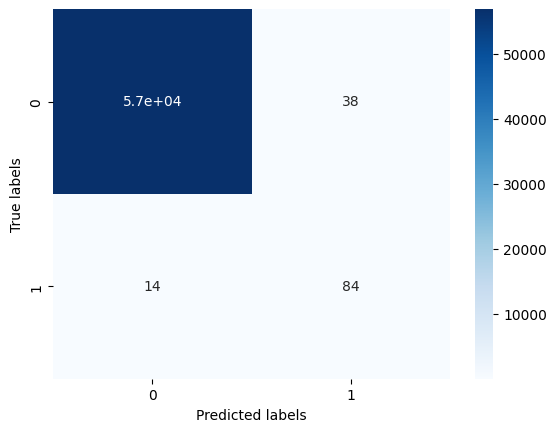

In [ ]:
############# CM for RF ############

print('\nConfusion Matrix of random forest - Testing Dataset')
print(pd.crosstab(y_test.ravel(), y_test_pred_rf, rownames = ['True'], colnames = ['Predicted'], margins = True))

cm = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig("RFCM.png", dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# calculate the F1 score
f1_rf = f1_score(y_test, y_test_pred_rf)

# print the F1 score
print('F1 score for Random forest: {:.4f}'.format(f1_rf))


F1 score for Random forest: 0.7456
